In [1]:
from bs4 import BeautifulSoup, Tag

import nltk.data

import re
import sys
import string
import json

from datetime import datetime
from dateutil.parser import parse

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import pdb
from pymongo import MongoClient
from pymongo import InsertOne, DeleteOne, ReplaceOne, UpdateMany, UpdateOne
from pprint import pprint

from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from collections import OrderedDict

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

client = MongoClient()
db = client.polymedia
print("Collections: ",db.list_collection_names())

Collections:  ['subreddit_polyamory', 'temp', 'pitm_2', 'pitm', 'test', 'subreddit_marriage', 'subreddit_relationships']


In [2]:
db.subreddit_polyamory.count_documents({})

17503

In [3]:
db.pitm_2.find_one({}).keys()

dict_keys(['_id', 'raw_post_html', 'raw_comments_html', 'comments', 'num_comments', 'post_date_string', 'post_date', 'post_title', 'quotes', 'editorial_text'])

In [4]:
submission_dates = [el['utc_submission'] for el in list(db.subreddit_polyamory.find({},{'_id':0,'utc_submission':1}))]
len(submission_dates)

17503

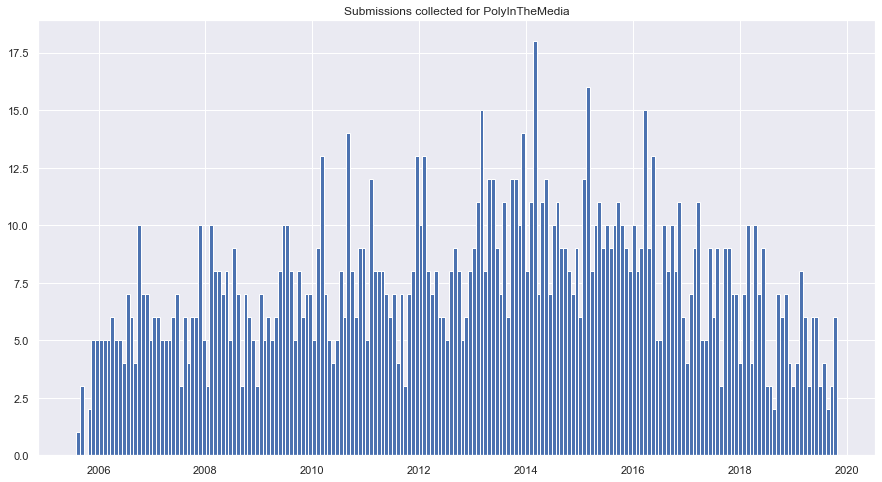

In [53]:
submission_dates = [el['post_date'] for el in list(db.pitm.find({},{'_id':0,'post_date':1}))]
len(submission_dates)
days = [datetime.date(el) for el in submission_dates]
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Submissions collected for PolyInTheMedia')
plt.hist(days, bins=200);

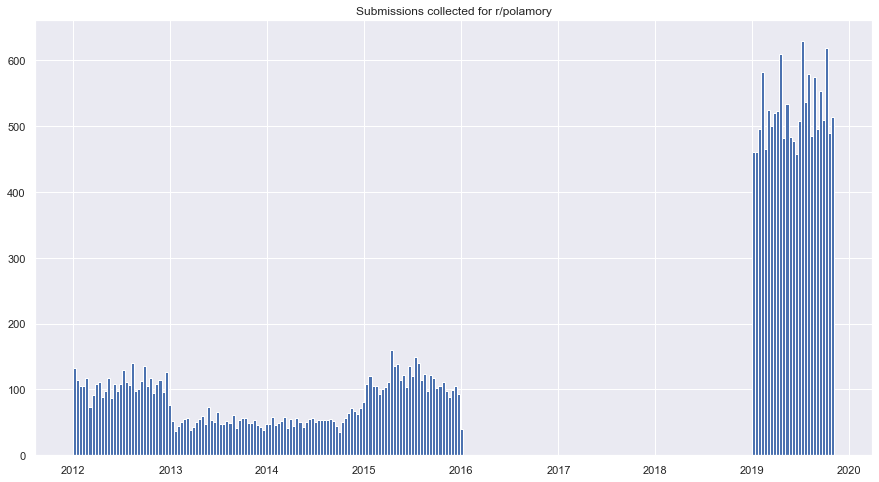

In [8]:
# r/polyamory #

submission_dates = [el['utc_submission'] for el in list(db.subreddit_polyamory.find({},{'_id':0,'utc_submission':1}))]
len(submission_dates)
days = [datetime.date(el) for el in submission_dates]
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Submissions collected for r/polamory')
plt.hist(days, bins=250);

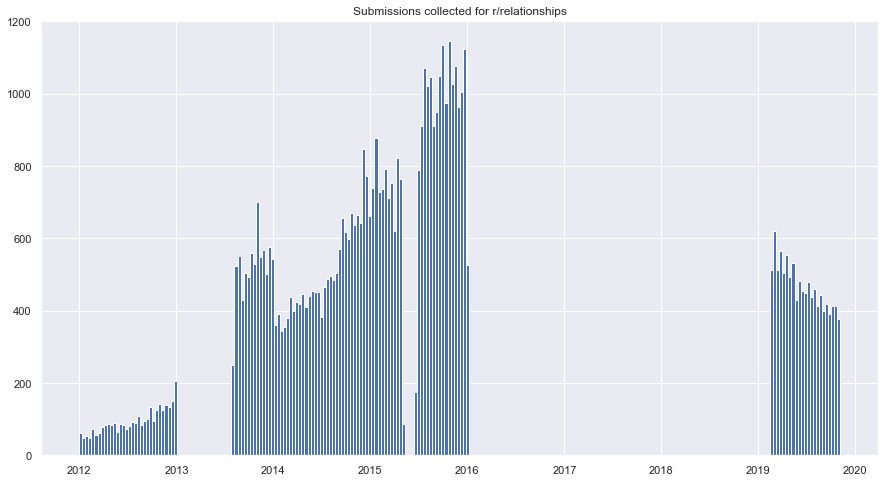

In [11]:
# r/relationships #

submission_dates = ([el['utc_submission'] for el in
                     list(db.subreddit_relationships.find(
                         { 'utc_submission': {'$exists': True }},
                         {'_id':0,'utc_submission':1}
                     ))])
days = [datetime.date(el) for el in submission_dates]
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Submissions collected for r/relationships')
plt.hist(days, bins=250);

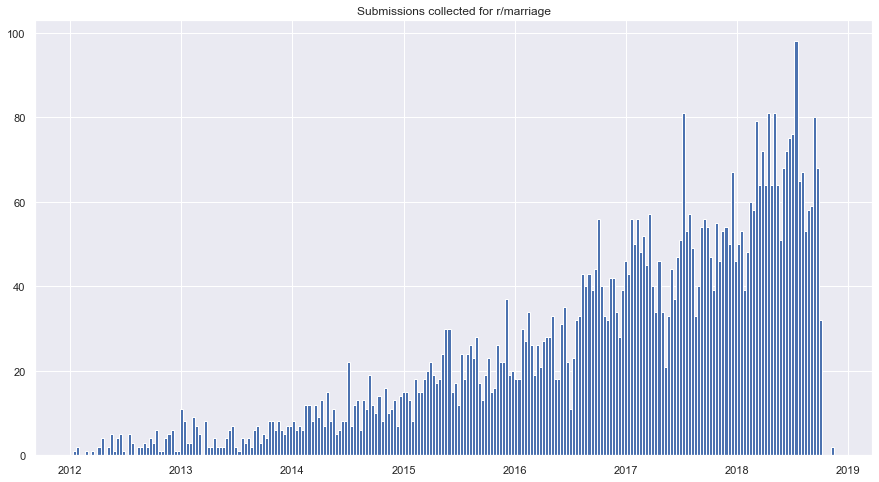

In [73]:
submission_dates = ([el['utc_submission'] for el in
                     list(db.subreddit_marriage.find(
                         { 'utc_submission': {'$exists': True }},
                         {'_id':0,'utc_submission':1}
                     ))])
days = [datetime.date(el) for el in submission_dates]
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Submissions collected for r/marriage')
plt.hist(days, bins=250);